# Example to run inversion using box model
The inversion estimates the emissions deviation from some a priori value

In [1]:
from py12box_invert import core, utils
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
project_path = Path("/home/lw13938/work/py12box_invert/data/example")
species = "CFC-11"
case = "CFC-11"

This runs the inversion to estimate yearly emissions for each box

In [3]:
x_hat, P_hat, emis_ref, time = core.run_inversion(project_path, case, species, ic0=np.array([253,253,253,253]))

  7%|▋         | 2/29 [00:00<00:02, 10.63it/s]

Running model. This may be slow for the first run...
... done in 0.024261951446533203 s


100%|██████████| 29/29 [00:02<00:00, 10.56it/s]


Prior emissions uncertainty defaulting to 100 Gg/box/yr


This will calculate annual emissions from the output

In [4]:
x_out, x_sd_out = core.annual_means(x_hat, P_hat, emis_ref)

Plot the results

Text(0, 0.5, 'Emissions Gg/yr')

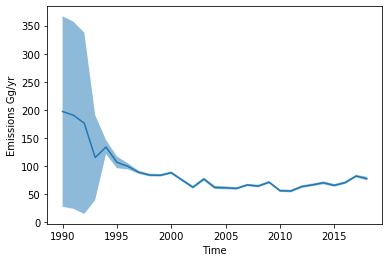

In [8]:
plt.plot(time[::12], x_out)
plt.fill_between(time[::12], x_out-x_sd_out, x_out+x_sd_out, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Emissions Gg/yr")